In [8]:
import random
import math
import pandas as pd
import time
import csv

csv_file = "2023_AI_TSP.csv"
solution_file = "tsp_solution.csv"
ga_interaction = 1000
running_time = 1000
start_time = time.time()

data = pd.read_csv(csv_file, header=None, names=['x','y'])
list_data = data.values.tolist()
len_data = len(list_data)

def distance_between_node(node1,node2):
    distance_x = list_data[node1][0] - list_data[node2][0]
    distance_y = list_data[node1][1] - list_data[node2][1]
    distance = math.sqrt(math.pow(distance_x,2)+math.pow(distance_y,2))
    return distance
    
def make_path_list():
    path_list = []
    for i in range(running_time):
        path = list(range(1,len_data))
        random.shuffle(path)
        if path not in path_list:
            path.insert(0,0)
        path_list.append(path)
    return path_list

def find_best_path(running_time):
    best_path = []
    dist = float('inf')
    for path in range(running_time):
        path_list = make_path_list()
        for path in path_list:
            candidate_dist = evaluate_path(path)
            if candidate_dist < dist:
                best_path = path
                dist = candidate_dist
    f = open(solution_file,"w")
    for i in best_path:
        f.write(str(i) + '\n')
    f.close()
    return dist 

def evaluate_path(path):
    dist = 0 
    for i in range(0,len(path)):
        node1=path[i]
        node2=path[(i+1)%len(path)]
        dist = dist + distance_between_node(node1,node2)
    return dist

final_dist = find_best_path(ga_interaction)

f = open(solution_file,"r")
rdr = csv.reader(f)
final_path = []
for line in rdr:
    final_path.append(line)
f.close()
end_time = time.time()

print("최적경로:",final_path)
print("최적거리:",final_dist)


최적경로: [['0'], ['643'], ['872'], ['326'], ['450'], ['58'], ['394'], ['306'], ['775'], ['481'], ['927'], ['440'], ['247'], ['562'], ['655'], ['866'], ['160'], ['375'], ['827'], ['449'], ['102'], ['37'], ['94'], ['962'], ['381'], ['712'], ['516'], ['529'], ['189'], ['637'], ['499'], ['369'], ['821'], ['219'], ['806'], ['13'], ['368'], ['591'], ['476'], ['292'], ['682'], ['372'], ['128'], ['557'], ['949'], ['956'], ['222'], ['386'], ['116'], ['24'], ['708'], ['745'], ['132'], ['406'], ['255'], ['973'], ['823'], ['301'], ['445'], ['163'], ['573'], ['303'], ['101'], ['365'], ['197'], ['155'], ['206'], ['462'], ['286'], ['608'], ['620'], ['49'], ['270'], ['15'], ['327'], ['53'], ['793'], ['985'], ['40'], ['452'], ['565'], ['262'], ['822'], ['226'], ['459'], ['100'], ['256'], ['937'], ['430'], ['32'], ['55'], ['143'], ['493'], ['945'], ['17'], ['525'], ['510'], ['468'], ['244'], ['547'], ['887'], ['354'], ['152'], ['586'], ['77'], ['864'], ['523'], ['480'], ['316'], ['192'], ['252'], ['812'], 

Total distance: 44506.485976693504


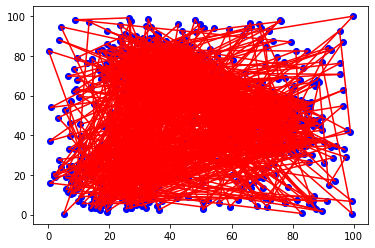

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read city coordinates from CSV file 
df = pd.read_csv('2023_AI_TSP.csv')
coordinates = df.to_numpy()

def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def nearest_neighbor(city, unvisited_cities):
    for c in unvisited_cities:
        distances = [distance(city, c)] 
    return np.argmin(distances)

def solve_tsp_nn(coordinates):
    n_cities = len(coordinates) 
    current_city = coordinates[0]
    unvisited_cities = np.delete(coordinates, 0, axis=0) 
    visited_cities = [current_city]
    while len(unvisited_cities) > 0:
        nearest = nearest_neighbor(current_city, unvisited_cities) 
        visited_cities.append(unvisited_cities[nearest])
        current_city = unvisited_cities[nearest]
        unvisited_cities = np.delete(unvisited_cities, nearest, axis=0) 
    visited_cities.append(coordinates[0]) 
    return visited_cities

tour = solve_tsp_nn(coordinates)
total_distance = 0
for i in range(len(tour) - 1):
    total_distance += distance(tour[i], tour[i+1]) 
print('Total distance:', total_distance)

# Plot tour
plt.plot(coordinates[:, 0], coordinates[:, 1], 'bo')
plt.plot(tour[0][0], tour[0][1], 'ro')
for i in range(len(tour) - 1):
    plt.plot([tour[i][0],tour[i+1][0]], [tour[i][1], tour[i+1][1]], 'r-') 
plt.show()

In [34]:
import random
import math
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import time

mutationrate = 5
mutationcount = 2 
threshold = 35000

def read_csv(csvfile):
    df = pd.read_csv(csvfile)
    return df.values

csvfile = '2023_AI_TSP.csv'
city = read_csv(csvfile)
citycoordiantes = read_csv(csvfile)
citysize = len(citycoordiantes)

class genome():
    chronosomes = []
    fitness = 100000
    def __init__(self,numberofchronosomes = None):
        if numberofchronosomes is not None:
            self.chronosomes = list[range(numberofchronosomes)]
            randshuffle(self.chronosomes)

def init_population(populationsize):
    population = []
    for i in range(populationsize):
        Genome = genome()
        Genome.chronosomes = list(range(citysize))
        start_city = Genome.chronosomes[0]
        Genome.chronosomes.remove(start_city)
        Genome.chronosomes.insert(0,start_city)
        random_shuffle(Genome.chronosomes)
        Genome.fitness = evaluate(Genome.chronosomes)
        population.append(Genome)
    return population

def evaluate(chronosomes):
    fitness = 0
    for i in range(len(chronosomes)-1):
        p1 = citycoordinates[chronosomes[i]]
        p2 = citycoordinates[chronosomes[i+1]]
        fitness += euclidean_distances(p1,p2)
        fitness = np.round(fitness,2)
        return fitness

def euclidean_distances(p1,p2):
    dist = np.linalg.norm(np.array(p1)-np.array(p2))
    return dist

def findbestgenome(population):
    allfitness = [i.fitness for i in population]
    bestfitness = min(allfitness)
    return population[allfitness.index(bestfitness)]

def selection(population,k):
    select = [population[random.randrange(0,len(population))] for i in range(k)]
    bestgenome = findbestgenome(select)
    return bestgenome
    
def reproduction(population):
    parent1 = selection(population,20).chronosomes
    parent2 = selection(population,20).chronosomes
    while parent1 == parent2:
        parent2 = selection(population,15).chronosomes
    return crossover(parent1,parent2)

def crossover (parent1,parent2):
    child = genome(None)
    child.chronsomes = [] 
    firstindex = random.randint(0,len(parent1)-1)
    secondindex = random.randint(firstindex,len(parent1)-1)
    innerset = parent1[firstindex:secondindex]
    startset = []
    endset = []
    for _,value in enumerate([item for item in parent2 if item not in innerset]):
        if len(startset)<firstindex:
            startset.append(value)
        else:
            endset.append(value)
    child.chronosomes = startset + inneerset + endset
    if random.randrange(0, 100) < MUTATION_RATE:
        child.chromosomes = Mutation(child.chromosomes) 
    child.fitness = Evaluate(child.chromosomes)
    return child

def Mutation(chromo) :
    for x in range(MUTATION_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)] 
    while p1 == p2 or p1 > p2:
        p1 = random.randint(0, len(chromo) - 1) 
        p2 = random.randint(0, len(chromo) - 1)
        log = chromo[p1:p2] 
        log = log[::-1]
    chromo = chromo[:p1] + log +chromo[p2:] 
    return chromo
#시각화 _ Visualization
def fitness_plot(generation, allBestFitness):
    plt.plot(range(0, generation), allBestFitness, c='blue')
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.title('Fitness Function')
    plt.show()
def city_visualize(bestGenome, city): 
    start = city[0]
    plt.scatter(start[0], start[1], c="green", marker=">")
    plt.annotate("Start", (start[0] + 2, start[1] - 2), color='red') 
#edge 표현을 위한 x, y 범위
    x_edge = [city[i][0] for i in bestGenome.chromosomes] 
    y_edge = [city[i][1] for i in bestGenome.chromosomes]
    plt.plot(x_edge, y_edge, color="blue", linewidth=0.07, linestyle="-")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('City Edges')
    plt.show()
def GeneticAlgorithm(populationSize, Generation_Count): 
    allBestFitness = []
    population = init_population(populationSize) 
    generation = 0
    TotalBestFitness = 100000 
    TotalBestPath = []
    start = time.time()
    while generation < Generation_Count: 
        generation += 1
    for i in range(populationSize):
        population.append(Reproduction(population)) 
    for genom in population:
        if genom.fitness > THRESHOLD: 
            population.remove(genom)
            averageFitness = round(np.sum([genom.fitness for genom in population])/len(population), 2)
            bestGenome = findBestGenome(population) 
    if bestGenome.fitness < TotalBestFitness:
        TotalBestFitness = bestGenome.fitness 
        TotalBestPath = bestGenome.chromosomes
    print("\n" * 5)
    print("Generation: {0}\nPopulation Size: {1}\t Average Fitness: {2}\nBestFitness: {3}",format(generation, len(population), averageFitness, bestGenome.fitness))
    allBestFitness.append(bestGenome.fitness) 
    print("\nTotal Best Fitness : ",TotalBestFitness) 
    end = time.time()
    print("Total time : ", end-start) # 소요 시간 표기, Working Time 
    #시각화
    fitness_plot(generation, allBestFitness) 
    city_visualize(bestGenome, cityCoordinates)
#csv 파일 경로 저장
    f = open('temp.csv', 'w', newline='') 
    wr = csv.writer(f)
    for i in range(0, citySize):
        wr.writerow([TotalBestPath[i]]) 
    f.close()
if __name__ == "__main__":
    GeneticAlgorithm(populationSize=20, Generation_Count=5000) #Population size, 


NameError: name 'random_shuffle' is not defined